In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install plotly==4.12.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
data=pd.read_csv('results.csv')

In [5]:
data.head(5)

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
date          41640 non-null object
home_team     41640 non-null object
away_team     41640 non-null object
home_score    41640 non-null int64
away_score    41640 non-null int64
tournament    41640 non-null object
city          41640 non-null object
country       41640 non-null object
neutral       41640 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [7]:
data.size

374760

In [8]:
data.shape

(41640, 9)

In [9]:
data.describe()

home_score    away_score
count  41640.000000  41640.000000
mean       1.744813      1.187680
std        1.753365      1.404828
min        0.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      1.000000
75%        2.000000      2.000000
max       31.000000     21.000000

In [10]:
data.sample(frac=0.1)

date     home_team    away_team  home_score  away_score  \
29196  2007-06-02        Norway        Malta           4           0   
27190  2004-12-11  Saudi Arabia       Kuwait           1           2   
39306  2017-10-08      Slovenia     Scotland           2           2   
7266   1969-10-26       Morocco        Sudan           3           0   
31334  2009-06-14  South Africa         Iraq           0           0   
...           ...           ...          ...         ...         ...   
31274  2009-06-06   El Salvador       Mexico           2           1   
13132  1984-07-31       Romania     China PR           1           0   
29894  2008-01-18       Bermuda  Puerto Rico           0           1   
30913  2008-11-22       Estonia    Lithuania           1           1   
32847  2011-03-21      Maldives     Cambodia           4           0   

                            tournament          city       country  neutral  
29196          UEFA Euro qualification          Oslo        Norway    False  
27190                         Gulf Cup        Rayyan         Qatar     True  
39306     FIFA World Cup qualification     Ljubljana      Slovenia    False  
7266      FIFA World Cup qualification    Casablanca       Morocco    False  
31334               Confederations Cup  Johannesburg  South Africa    False  
...                                ...           ...           ...      ...  
31274     FIFA World Cup qualification  San Salvador   El Salvador    False  
13132                         Friendly         Buzău       Romania    False  
29894                         Friendly      Hamilton       Bermuda    False  
30913                         Friendly    Kuressaare       Estonia    False  
32847  AFC Challenge Cup qualification          Malé      Maldives    False  

[4164 rows x 9 columns]

In [11]:
data.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [12]:
data.corr()

home_score  away_score   neutral
home_score    1.000000   -0.136000 -0.032099
away_score   -0.136000    1.000000  0.084906
neutral      -0.032099    0.084906  1.000000

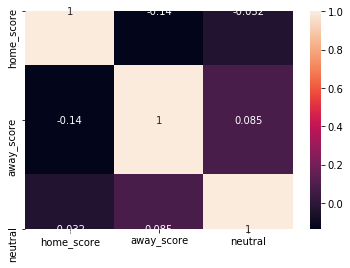

In [13]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [14]:
data.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [15]:
for i,col in enumerate(data.columns):
    print(i+1,'-',col)

1 - date
2 - home_team
3 - away_team
4 - home_score
5 - away_score
6 - tournament
7 - city
8 - country
9 - neutral


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41640 entries, 0 to 41639
Data columns (total 9 columns):
date          41640 non-null object
home_team     41640 non-null object
away_team     41640 non-null object
home_score    41640 non-null int64
away_score    41640 non-null int64
tournament    41640 non-null object
city          41640 non-null object
country       41640 non-null object
neutral       41640 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


In [17]:
data['home_score'].describe()

count    41640.000000
mean         1.744813
std          1.753365
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         31.000000
Name: home_score, dtype: float64

In [18]:
away_team=pd.DataFrame(data.groupby('away_team')['home_score'].count().index)
away_score=pd.DataFrame(data.groupby('away_team')['home_score'].count().values,columns=['Score'])
away_score_team=pd.concat([away_team,away_score],axis=1)

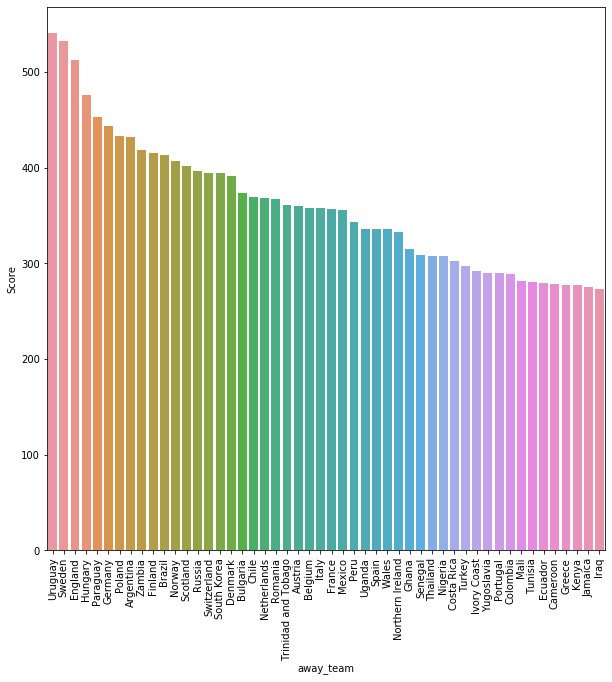

In [19]:
plt.figure(figsize=(10,10))
away_score_team=away_score_team.sort_values(by='Score',ascending=False)
sns.barplot(x=away_score_team.away_team[:50],y=away_score_team.Score[:50])
plt.xticks(rotation=90)
plt.show()

In [20]:
data.isnull().values.any()

False

In [21]:
data.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [22]:
data['tournament'].value_counts()

Friendly                                17029
FIFA World Cup qualification             7236
UEFA Euro qualification                  2582
African Cup of Nations qualification     1672
FIFA World Cup                            900
                                        ...  
World Unity Cup                             4
OSN Cup                                     4
Copa América qualification                  2
AFF Championship qualification              2
Atlantic Heritage Cup                       2
Name: tournament, Length: 112, dtype: int64

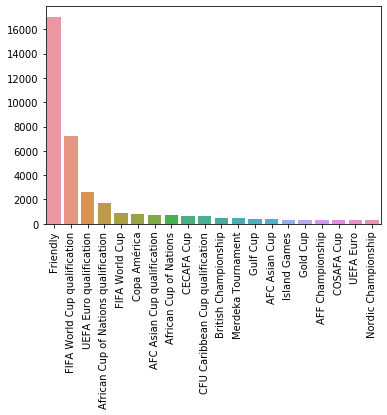

In [23]:
sns.barplot(x=data['tournament'].value_counts().index[:20],y=data['tournament'].value_counts().values[:20])
plt.xticks(rotation=90)
plt.show()

In [24]:
data['tournament'].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'CCCF Championship',
       'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'CONCACAF Championship',
       'Copa Juan Pinto Durán', 'UAFA Cup', 'South Pacific Games',
       'CONCACAF Championship qualificatio

In [25]:
sayisi=len(data['tournament'].unique())
sayisi

112

In [26]:
tournament=data['tournament'].value_counts()
names=tournament.index
value=tournament.values

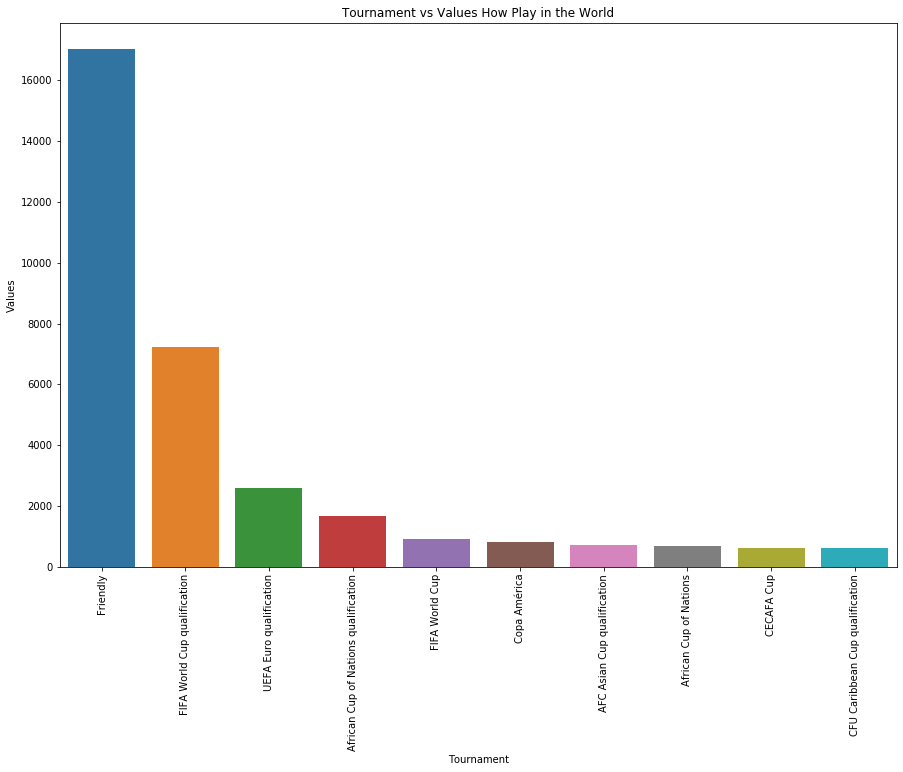

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=names[:10],y=value[:10])
plt.xticks(rotation=90)
plt.xlabel('Tournament')
plt.ylabel('Values')
plt.title('Tournament vs Values How Play in the World')
plt.show()

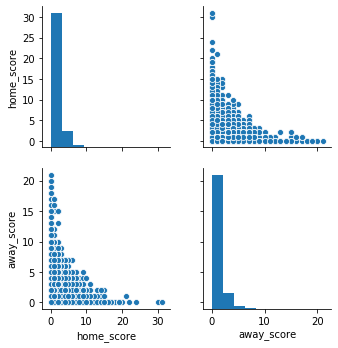

In [28]:
sns.pairplot(data.iloc[:,3:5])
plt.show()

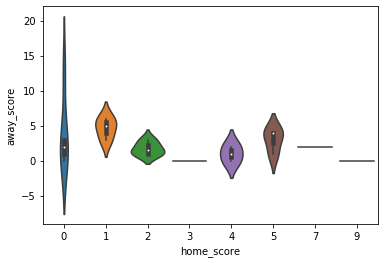

In [29]:
sns.violinplot(x=data['home_score'][:20],y=data['away_score'][:20])
plt.show()

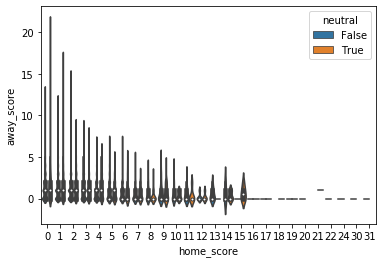

In [30]:
sns.violinplot(x='home_score',y='away_score',hue='neutral',data=data)
plt.show()
    

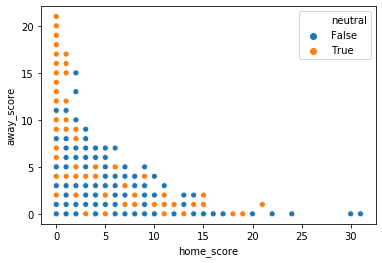

In [31]:
sns.scatterplot(x='home_score',y='away_score',hue='neutral',data=data)
plt.show()

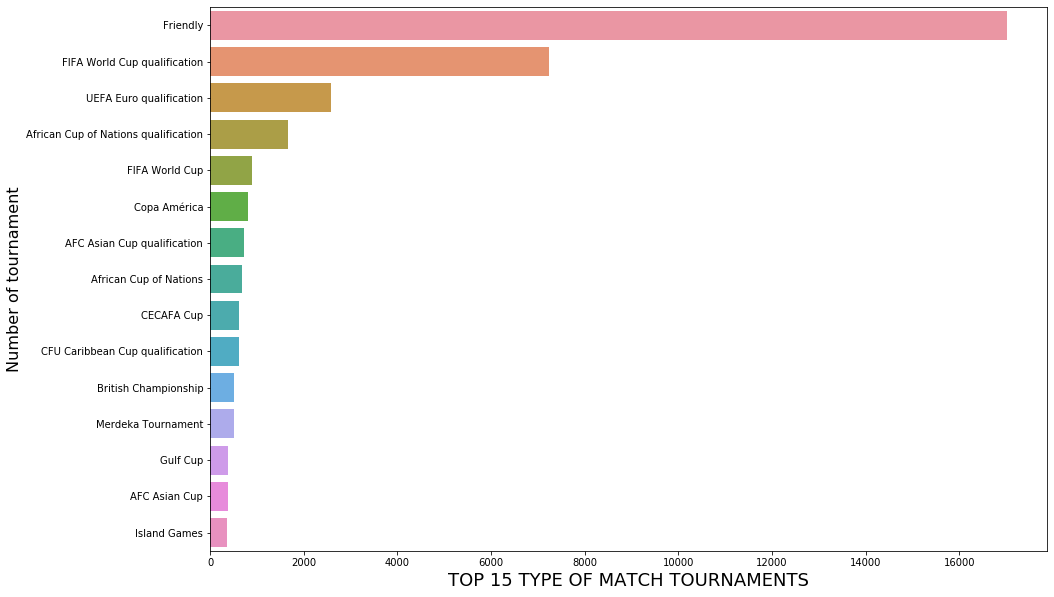

In [32]:
matches = data.astype({'date':'datetime64[ns]'})
tournament=matches['tournament'].value_counts()
tournament=tournament[:15]
plt.figure(figsize=(15,10))
ax = sns.barplot(y=tournament.index, x=tournament.values, orient='h')
ax.set_ylabel('Number of tournament', size=16)
ax.set_xlabel('TOP 15 TYPE OF MATCH TOURNAMENTS',fontsize=18)
plt.show()


In [37]:
tournament_liste=data.tournament.unique()
home_score_liste=[]
away_score_liste=[]
for tour in tournament_liste:
    home_score_liste.append(sum(data[data['tournament']==tour].home_score))
    away_score_liste.append(sum(data[data['tournament']==tour].away_score))

trace1=go.Bar(x=tournament_liste,y=home_score_liste,name='Home Score',marker = dict(color = 'rgba(255, 50, 70, 0.2)',line=dict(color='rgb(0,0,0)',width=1.5)),text='')
trace2=go.Bar(x=tournament_liste,y=away_score_liste,name='Away Score',marker = dict(color = 'rgba(0, 0, 0, 0.3)',line=dict(color='rgb(0,0,0)',width=1.5)),text ='') 
data2=[trace1,trace2]
layout=go.Layout(barmode='group')
fig=go.Figure(data=data2,layout=layout)
iplot(fig)

In [38]:
veri=data[data['tournament']=='FIFA World Cup'].tail(56)
veri

date     home_team     away_team  home_score  away_score  \
39893  2018-06-17    Costa Rica        Serbia           0           1   
39894  2018-06-17       Germany        Mexico           0           1   
39895  2018-06-17        Brazil   Switzerland           1           1   
39896  2018-06-18        Sweden   South Korea           1           0   
39897  2018-06-18       Belgium        Panama           3           0   
39898  2018-06-18       Tunisia       England           1           2   
39899  2018-06-19      Colombia         Japan           1           2   
39900  2018-06-19        Poland       Senegal           1           2   
39901  2018-06-19        Russia         Egypt           3           1   
39902  2018-06-20      Portugal       Morocco           1           0   
39903  2018-06-20       Uruguay  Saudi Arabia           1           0   
39904  2018-06-20          Iran         Spain           0           1   
39905  2018-06-21       Denmark     Australia           1           1   
39906  2018-06-21        France          Peru           1           0   
39907  2018-06-21     Argentina       Croatia           0           3   
39908  2018-06-22        Brazil    Costa Rica           2           0   
39909  2018-06-22       Nigeria       Iceland           2           0   
39910  2018-06-22        Serbia   Switzerland           1           2   
39911  2018-06-23       Belgium       Tunisia           5           2   
39912  2018-06-23   South Korea        Mexico           1           2   
39913  2018-06-23       Germany        Sweden           2           1   
39914  2018-06-24       England        Panama           6           1   
39915  2018-06-24         Japan       Senegal           2           2   
39916  2018-06-24        Poland      Colombia           0           3   
39917  2018-06-25        Russia       Uruguay           0           3   
39918  2018-06-25  Saudi Arabia         Egypt           2           1   
39919  2018-06-25         Spain       Morocco           2           2   
39920  2018-06-25          Iran      Portugal           1           1   
39921  2018-06-26     Australia          Peru           0           2   
39922  2018-06-26       Denmark        France           0           0   
39923  2018-06-26       Nigeria     Argentina           1           2   
39924  2018-06-26       Iceland       Croatia           1           2   
39925  2018-06-27   South Korea       Germany           2           0   
39926  2018-06-27        Mexico        Sweden           0           3   
39927  2018-06-27        Serbia        Brazil           0           2   
39928  2018-06-27   Switzerland    Costa Rica           2           2   
39929  2018-06-28         Japan        Poland           0           1   
39930  2018-06-28       Senegal      Colombia           0           1   
39931  2018-06-28        Panama       Tunisia           1           2   
39932  2018-06-28       England       Belgium           0           1   
39933  2018-06-30        France     Argentina           4           3   
39934  2018-06-30       Uruguay      Portugal           2           1   
39935  2018-07-01        Russia         Spain           1           1   
39936  2018-07-01       Croatia       Denmark           1           1   
39937  2018-07-02        Brazil        Mexico           2           0   
39938  2018-07-02       Belgium         Japan           3           2   
39939  2018-07-03        Sweden   Switzerland           1           0   
39940  2018-07-03      Colombia       England           1           1   
39942  2018-07-06       Uruguay        France           0           2   
39943  2018-07-06        Brazil       Belgium           1           2   
39944  2018-07-07        Sweden       England           0           2   
39945  2018-07-07        Russia       Croatia           2           2   
39946  2018-07-10        France       Belgium           1           0   
39947  2018-07-11       Croatia       England           2           1  

In [39]:
len(veri['home_team'].unique())
allteam=veri['home_team'].unique()
allteam

array(['Costa Rica', 'Germany', 'Brazil', 'Sweden', 'Belgium', 'Tunisia',
       'Colombia', 'Poland', 'Russia', 'Portugal', 'Uruguay', 'Iran',
       'Denmark', 'France', 'Argentina', 'Nigeria', 'Serbia',
       'South Korea', 'England', 'Japan', 'Saudi Arabia', 'Spain',
       'Australia', 'Iceland', 'Mexico', 'Switzerland', 'Senegal',
       'Panama', 'Croatia'], dtype=object)

In [40]:
away_scores_allteam=[]
home_scores_allteam=[]
for team in allteam:
    toplam=sum(veri[veri['home_team']==team].away_score)
    away_scores_allteam.append(toplam)
    home_scores_allteam.append(sum(veri[veri['home_team']==team].home_score))
    toplam=0

away_scores_allteam
home_scores_allteam
allteam

all_team=pd.DataFrame([allteam,home_scores_allteam,away_scores_allteam])
                       
all_team

0        1       2       3        4        5         6       7   \
0  Costa Rica  Germany  Brazil  Sweden  Belgium  Tunisia  Colombia  Poland   
1           0        2       6       2       13        1         2       1   
2           1        2       3       2        4        2         3       5   

       8         9   ...     19            20     21         22       23  \
0  Russia  Portugal  ...  Japan  Saudi Arabia  Spain  Australia  Iceland   
1       6         1  ...      2             2      2          0        1   
2       7         0  ...      3             1      2          2        2   

       24           25       26      27       28  
0  Mexico  Switzerland  Senegal  Panama  Croatia  
1       0            2        0       1        3  
2       3            2        1       2        2  

[3 rows x 29 columns]

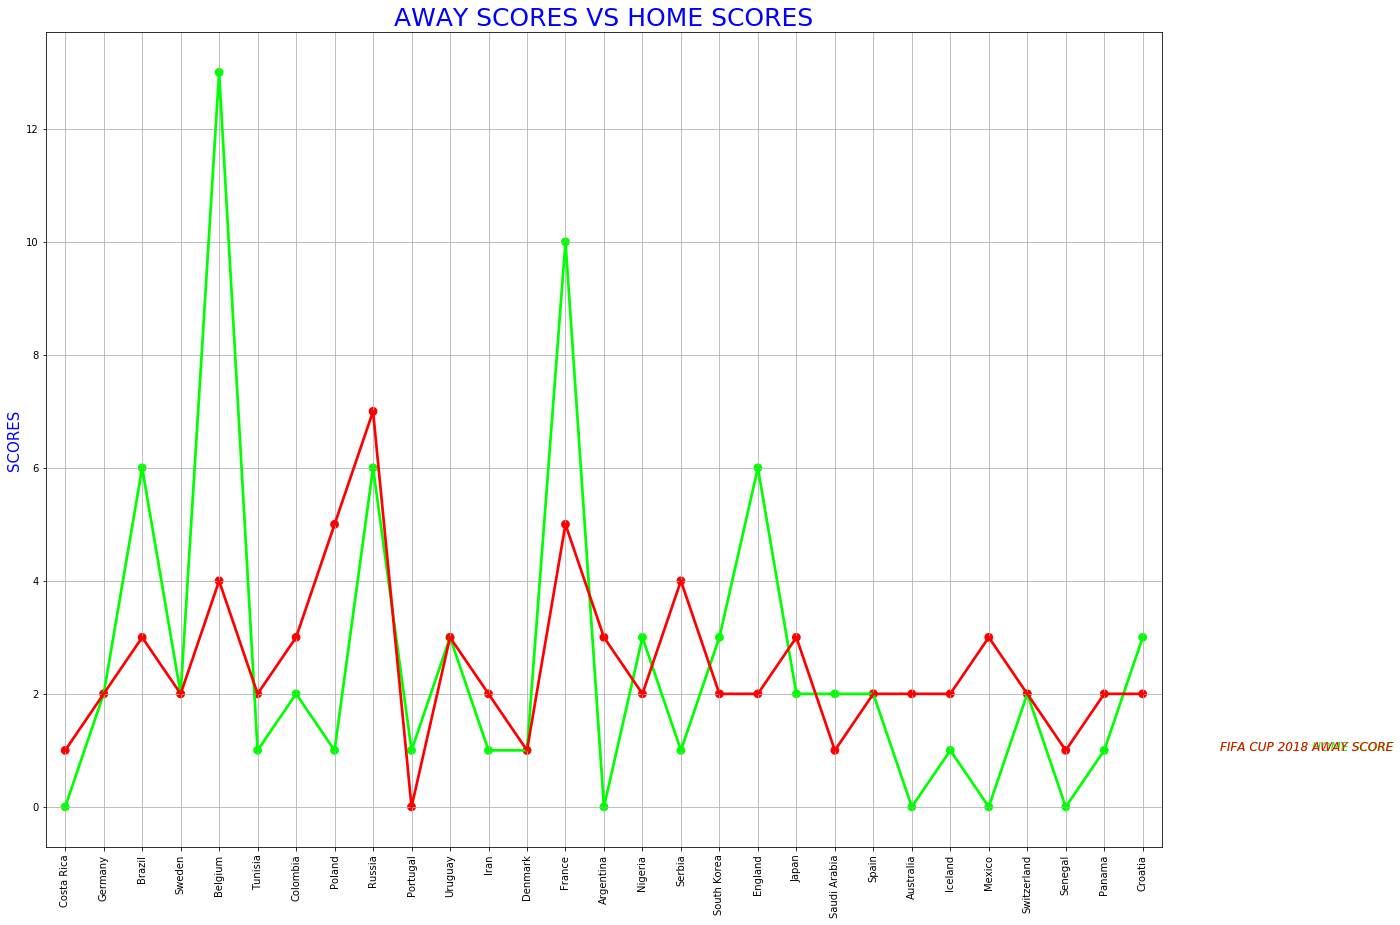

In [43]:
plt.figure(figsize=(20,15))
sns.pointplot(x=allteam,y=home_scores_allteam,data=veri,color='lime',alpha=0.8)
sns.pointplot(x=allteam,y=away_scores_allteam,data=veri,color='red',alpha=0.8)
plt.text(30,1,'FIFA CUP 2018 HOME SCORE',color='lime',fontsize=12,style='italic')
plt.text(30,1,'FIFA CUP 2018 AWAY SCORE',color='red',fontsize=12,style='italic')
plt.xticks(rotation=90)
plt.ylabel('SCORES',fontsize=15,color='blue')
plt.title('AWAY SCORES VS HOME SCORES',fontsize=25,color='blue')
plt.grid()

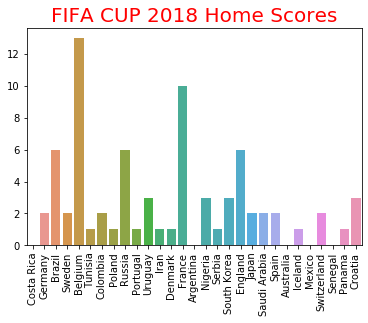

In [44]:
sns.barplot(x=allteam,y=home_scores_allteam)
plt.title('FIFA CUP 2018 Home Scores',color='r',fontsize=20)
plt.xticks(rotation=90)
plt.show()

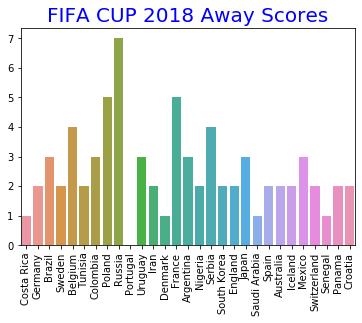

In [45]:
sns.barplot(x=allteam,y=away_scores_allteam)
plt.xticks(rotation=90)
plt.title('FIFA CUP 2018 Away Scores',color='b',fontsize=20)
plt.show()

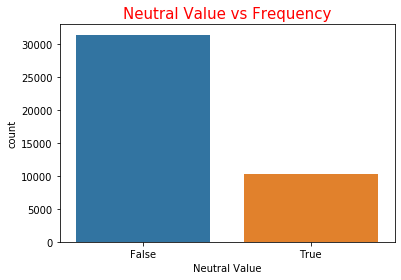

In [47]:
data['neutral'].unique()
data['neutral'].value_counts()
sns.countplot(data['neutral'])
plt.xlabel('Neutral Value')
plt.title('Neutral Value vs Frequency',color='red',fontsize=15)
plt.show()

AttributeError: 'Text' object has no property 'fontszie'

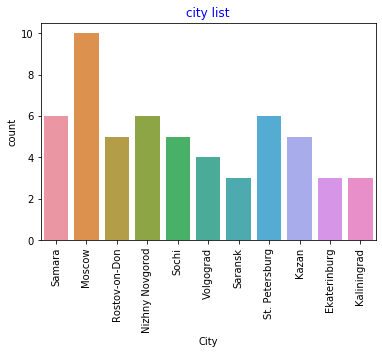

In [48]:
sns.countplot(veri.city)
plt.xlabel('City')
plt.xticks(rotation=90)
plt.title('city list',color='blue',fontszie=15)
plt.show()

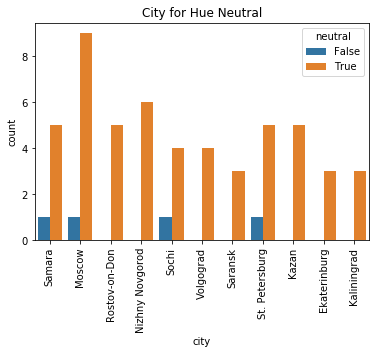

In [49]:
sns.countplot(veri.city,hue=veri.neutral)
plt.xticks(rotation=90)
plt.title('City for Hue Neutral')
plt.show()

In [50]:
tournaments=data.tournament.value_counts()
alltournaments=tournaments[:20]

fig = {
  "data": [
    {
      "values": alltournaments.values,
      "labels": alltournaments.index,
      "domain": {"x": [0, .5]},
      "name": "Tournaments Count",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Tournaments Rate",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Tour Counts",
                "x": 0.1,
                "y": 1.1
            },
        ]
    }
}
iplot(fig)

In [51]:
x=data[data['home_team']=='England'].groupby('away_team')['home_score'].count()

In [52]:
x

away_team
Albania           2
Algeria           1
Andorra           2
Argentina         7
Australia         2
                 ..
Ukraine           4
United States     5
Uruguay           6
Wales            53
Yugoslavia        8
Name: home_score, Length: 78, dtype: int64

In [53]:
away_team=pd.DataFrame(x.index)

In [54]:
away_team

away_team
0         Albania
1         Algeria
2         Andorra
3       Argentina
4       Australia
..            ...
73        Ukraine
74  United States
75        Uruguay
76          Wales
77     Yugoslavia

[78 rows x 1 columns]

In [55]:
score=pd.DataFrame(x.values,columns=['scores'])

In [56]:
score

scores
0        2
1        1
2        2
3        7
4        2
..     ...
73       4
74       5
75       6
76      53
77       8

[78 rows x 1 columns]

In [57]:
away_team_score=pd.concat([away_team,score],axis=1)

In [58]:
away_team_score

away_team  scores
0         Albania       2
1         Algeria       1
2         Andorra       2
3       Argentina       7
4       Australia       2
..            ...     ...
73        Ukraine       4
74  United States       5
75        Uruguay       6
76          Wales      53
77     Yugoslavia       8

[78 rows x 2 columns]

In [59]:
away_team_score.sort_values(by='scores',ascending=False,inplace=True)

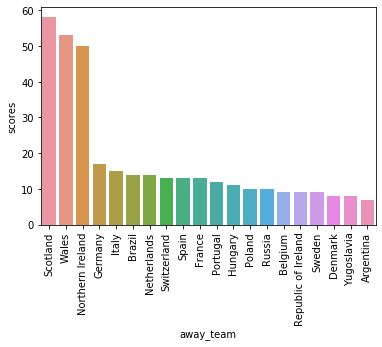

In [60]:
sns.barplot(x='away_team',y='scores',data=away_team_score[:20])
plt.xticks(rotation=90)
plt.show()

In [61]:
filter_2018=data[data['date'].str.contains('2018')]
filter_2018=filter_2018.sort_values(by='away_score',ascending=False)
filter_2018

date                 home_team              away_team  \
40188  2018-10-14              Saint Martin  Saint Kitts and Nevis   
39851  2018-06-07                     Tibet                Kabylia   
40175  2018-10-13  Turks and Caicos Islands                 Guyana   
40318  2018-11-17                Seychelles                  Libya   
40055  2018-09-09       U.S. Virgin Islands                 Canada   
...           ...                       ...                    ...   
39956  2018-08-18                 Guatemala                   Cuba   
39954  2018-08-18                   Andorra   United Arab Emirates   
39953  2018-08-15                 Guatemala                   Cuba   
39951  2018-08-04                    Belize               Barbados   
39971  2018-09-04                Bangladesh                 Bhutan   

       home_score  away_score                             tournament  \
40188           0          10  CONCACAF Nations League qualification   
39851           1           8              CONIFA World Football Cup   
40175           0           8  CONCACAF Nations League qualification   
40318           1           8   African Cup of Nations qualification   
40055           0           8  CONCACAF Nations League qualification   
...           ...         ...                                    ...   
39956           1           0                               Friendly   
39954           0           0                               Friendly   
39953           3           0                               Friendly   
39951           1           0                               Friendly   
39971           2           0                               SAFF Cup   

                 city                   country  neutral  
40188      The Valley                  Anguilla     True  
39851         Enfield                   England     True  
40175  Providenciales  Turks and Caicos Islands    False  
40318        Victoria                Seychelles    False  
40055       Bradenton             United States     True  
...               ...                       ...      ...  
39956  Quetzaltenango                 Guatemala    False  
39954          Grödig                   Austria     True  
39953  Guatemala City                 Guatemala    False  
39951       San Pedro                    Belize    False  
39971           Dhaka                Bangladesh    False  

[905 rows x 9 columns]

In [62]:
filter_1872=data[data['date'].str.contains('1872')]
filter_1872=filter_1872.sort_values(by='home_score',ascending=True)
filter_1872

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False

In [63]:
data.corr()

home_score  away_score   neutral
home_score    1.000000   -0.136000 -0.032099
away_score   -0.136000    1.000000  0.084906
neutral      -0.032099    0.084906  1.000000

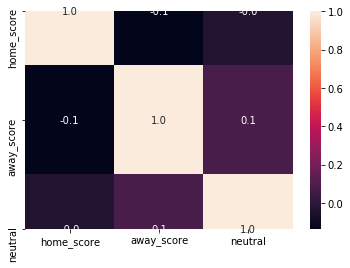

In [64]:
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()